In [17]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 21.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

In [86]:
import pandas as pd

train_df = pd.read_csv("IOT_Train.csv")

## EDA

In [87]:
train_df.head()

,mac,station_name,tambon_code,tambon_namt,amphur_code,amphur_namt,province_code,province_namt,latitude,longitude,time,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
0,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-20 15:00:00+07:00,70.6,59.0,NaN,NaN,0.0,45.0,4.3,32.6
1,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-16 09:00:00+07:00,62.3,76.0,NaN,NaN,0.0,45.0,1.9,37.9
2,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-06-26 19:00:00+07:00,90.3,0.0,NaN,NaN,0.0,135.0,3.2,26.4
3,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-07-16 04:00:00+07:00,91.7,0.0,NaN,NaN,0.0,157.5,0.0,25.6
4,3C71BF18EA64,บ้านนา_2,300903,กำปัง,3009,โนนไทย,30,นครราชสีมา,15.112831,102.052114,2022-05-30 08:00:00+07:00,59.1,71.0,NaN,NaN,0.0,180.0,2.3,36.2


In [88]:
train_df.describe()

,tambon_code,amphur_code,province_code,latitude,longitude,humid,light,pm10,pm2.5,rainfall,wind_direct,wind_speed,temp
count,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,13635.000000,6841.000000,6841.000000,13635.000000,13635.000000,13635.000000,13634.000000
mean,452665.897543,4526.625376,45.179391,15.498114,101.728711,80.428258,33.196553,7.657652,6.449203,0.135827,161.854785,4.533869,29.083827
std,213925.103701,2139.240731,21.448269,2.345306,2.180078,12.442925,34.509041,8.449023,8.415738,1.112371,100.338928,181.668659,4.344476
min,102601.000000,1026.000000,10.000000,10.579849,98.573417,40.900000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.200000
25%,300903.000000,3009.000000,30.000000,14.533026,100.569662,71.000000,0.000000,3.000000,2.000000,0.000000,45.000000,0.000000,25.800000
50%,380704.000000,3807.000000,38.000000,16.494229,102.052114,82.400000,16.000000,6.000000,4.000000,0.000000,180.000000,1.400000,28.100000
75%,550404.000000,5504.000000,55.000000,18.142499,104.350891,90.600000,68.000000,10.000000,9.000000,0.000000,225.000000,3.400000,31.700000
max,860206.000000,8602.000000,86.000000,18.241106,104.495172,100.000000,96.000000,368.000000,368.000000,34.100000,337.500000,15094.300000,51.100000


In [89]:
len(train_df)

13635

In [90]:
train_df.isnull().sum()

,0
mac,0
station_name,0
tambon_code,0
tambon_namt,0
amphur_code,0
amphur_namt,0
province_code,0
province_namt,0
latitude,0
longitude,0


In [91]:
test_df = pd.read_csv("IOT_Test.csv")

In [92]:
test_df.isnull().sum()

,0
id,0
mac,0
station_name,0
tambon_code,0
tambon_namt,0
amphur_code,0
amphur_namt,0
province_code,0
province_namt,0
latitude,0


<Axes: >

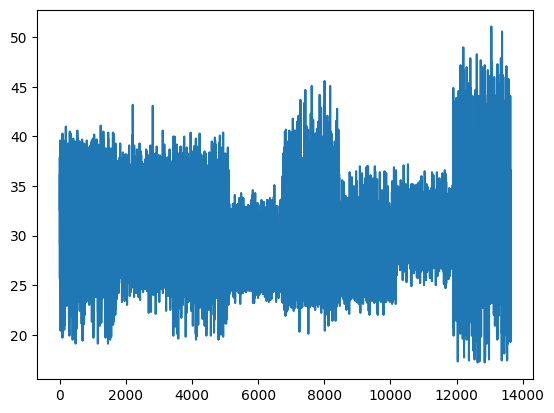

In [93]:
train_df['temp'].plot()

## Preprocessing and fill the nan Numbers

In [94]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

num_cols = list(train_df.select_dtypes(include=numerics).columns)
cat_cols = list(train_df.select_dtypes(include="object").columns)
cat_cols.remove("time")

In [95]:
test_cat_cols = list(test_df.select_dtypes(include="object").columns)
test_num_cols = list(test_df.select_dtypes(include=numerics).columns)
test_cat_cols.remove("time")

In [96]:
# Categorical - LabelEncoder

from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

train_df[cat_cols] = train_df[cat_cols].apply(LabelEncoder().fit_transform)
test_df[cat_cols] = test_df[test_cat_cols].apply(LabelEncoder().fit_transform)

test_df.drop(columns="id", inplace=True)

In [97]:
train_df["time"] = pd.to_datetime(train_df["time"])
test_df["time"] = pd.to_datetime(test_df["time"])

In [98]:
# Year, Month, Day: df['timestamp_col'].dt.year, df['timestamp_col'].dt.month, df['timestamp_col'].dt.day
# Hour, Minute, Second: df['timestamp_col'].dt.hour, df['timestamp_col'].dt.minute, df['timestamp_col'].dt.second
# Day of Week, Day of Year, Week of Year: df['timestamp_col'].dt.dayofweek, df['timestamp_col'].dt.dayofyear, df['timestamp_col'].dt.isocalendar().week

# Representing cyclical patterns like time of day or day of week using sine and cosine transformations can help models understand periodicity without implying a linear relationship.
# For example, for hour: df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24) and df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24).

In [99]:
import numpy as np

# Timestamp - Feature Engineering
def create_feature(df):
  df['year'] = df['time'].dt.year
  df['month'] = df['time'].dt.month
  df['day'] = df['time'].dt.day
  df["hour"] = df["time"].dt.hour
  df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
  df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
  df.drop(columns=["time"], inplace=True)
  return df

In [100]:
train_df = create_feature(train_df)
test_df = create_feature(test_df)

In [102]:
# Fill the NaN numbers

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=2)

columns_to_impute = ["pm10", "pm2.5"]

# Impute mean values
for col in columns_to_impute:
    train_df[col] = train_df[col].fillna(train_df[col].mean())
    test_df[col] = test_df[col].fillna(test_df[col].mean())


In [109]:
train_df = train_df.dropna()

In [111]:
from autogluon.tabular import TabularPredictor
import pandas as pd

# Specify the column to predict (target variable)
label_column = "temp"

# Initialize the AutoGluon TabularPredictor
predictor = TabularPredictor(label=label_column, eval_metric="mae").fit(train_df, time_limit=600, presets="best", ag_args_fit={'num_gpus': 1})

No path specified. Models will be saved in: "AutogluonModels/ag-20250705_091739"
Preset alias specified: 'best' maps to 'best_quality'.
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          8
Memory Avail:       46.65 GB / 50.99 GB (91.5%)
Disk Space Avail:   192.45 GB / 235.68 GB (81.7%)
Presets specified: ['best']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
DyStack is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
	This is used to identify the optimal `num_

In [113]:
predictions = predictor.predict(test_df)

KeyboardInterrupt: 

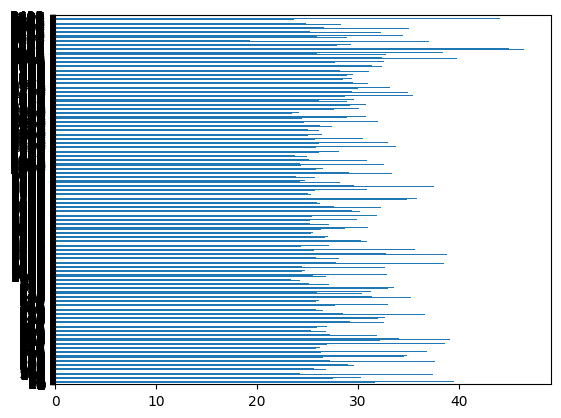

In [116]:
predictions.plot(kind='barh')

In [118]:
len(predictions)

3413

In [134]:
sub_df = pd.read_csv("IOT_Submit.csv")

In [135]:
len(sub_df)

3413

In [143]:
sub_df['temp'] = predictions

0	1	25.6
1	2	30.1
2	3	24.7

In [139]:
sub_df['temp'] = sub_df['temp'].round(2)

In [140]:
sub_df

,id,temp
0,1,25.750000
1,2,28.570000
2,3,25.100000
3,4,29.370001
4,5,34.230000
...,...,...
3408,3409,25.950001
3409,3410,32.849998
3410,3411,26.860001
3411,3412,25.129999


In [141]:
sub_df.to_csv("autogluon_best_roundup.csv", index=False)

In [144]:
sub_df['temp'].sum()

np.float32(99307.266)

* Round up - 99307.34